module://ipykernel.pylab.backend_inline
module://ipykernel.pylab.backend_inline
please click:====================


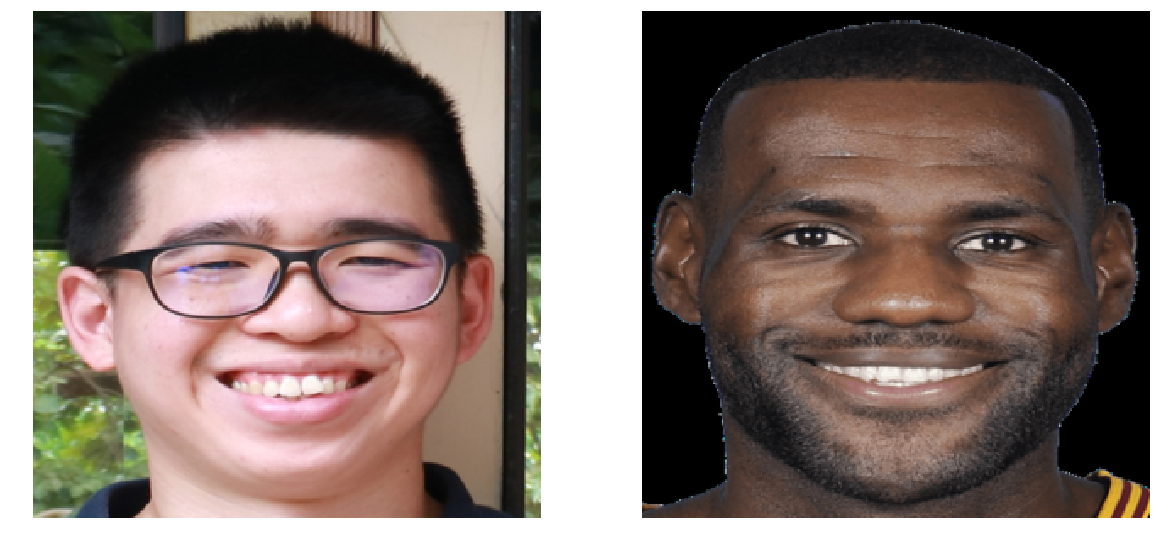

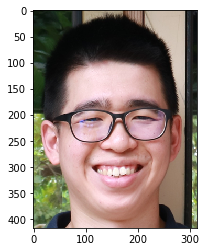

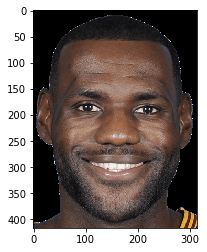

clicked: []
All tests passed! 



In [2]:
'''
  File name: test_script.py
  Author: Haoyuan(Steve) Zhang
  Date created: 9/26/2017
'''

'''
  File clarification:
    Check the accuracy of your algorithm
'''

import numpy as np
import click_correspondences as cc
import matplotlib
import matplotlib.pyplot as plt


from PIL import Image
from est_tps import est_tps
from obtain_morphed_tps import obtain_morphed_tps
from morph_tps import morph_tps
from morph_tri import morph_tri


# test triangulation morphing
def test_tri(im1, im2, im1_pts, im2_pts, warp_frac, dissolve_frac):
  # generate morphed image
  morphed_ims = morph_tri(im1, im2, im1_pts, im2_pts, warp_frac, dissolve_frac)

  # check output output image number
  if morphed_ims.shape[0] != 2:
    print "The number of output image is wrong. \n"
    return False

  morphed_im1 = morphed_ims[0, :, :, :]
  # check the color channel number
  if morphed_im1.shape[2] != 3:
    print "What happened to color channel? \n"
    return False

  # check the image size
  if morphed_im1.shape[0] != 50 or morphed_im1.shape[1] != 50:
    print "Something wrong about the size of output image. \n"
    return False

  print "Triangulation Morphing Test Passed!"
  return True


# test TPS morphing
def test_tps(im1, im2, im1_pts, im2_pts, warp_frac, dissolve_frac):
  a1_x, ax_x, ay_x, w_x = est_tps(im1_pts, im2_pts[:, 0])
  a1_y, ax_y, ay_y, w_y = est_tps(im1_pts, im2_pts[:, 1])

  # check parameter w size
  if w_x.size != 5 or w_y.size != 5:
    print "The parameter w from est_tps function has wrong size. \n"
    return False

  # check morphed images
  morphed_im1 = obtain_morphed_tps(im2, a1_x, ax_x, ay_x, w_x, a1_y, ax_y, ay_y, w_y, im1_pts, np.array([100, 150]))

  out_size = morphed_im1.shape
  if out_size[2] != 3 or out_size[0] != 100 or out_size[1] != 150:
    print "Wrong output image size, \n"
    return False

  # generate morphed image
  morphed_ims = morph_tps(im1, im2, im1_pts, im2_pts, warp_frac, dissolve_frac)

  # check output output image number
  if morphed_ims.shape[0] != 2:
    print "The number of output image is wrong. \n"
    return False

  morphed_im2 = morphed_ims[1, :, :, :]
  # check the color channel number
  if morphed_im2.shape[2] != 3:
    print "What happened to color channel? \n"
    return False

  # check the image size
  if morphed_im2.shape[0] != 50 or morphed_im2.shape[1] != 50:
    print "Something wrong about the size of output image. \n"
    return False

  print "TPS Morphing Test Passed!"
  return True


# the main test code
def main():
    
  print plt.get_backend()
  print plt.get_backend()
  # dummy image 1 and 2
  im1 = np.ones((3, 50, 50))
  im2 = np.zeros((3, 50, 50))
  
  #im1 = Image.open("im11.png")
  im1 = Image.open("im1.png").convert('RGB')
  im2 = Image.open("im2.png").convert('RGB')
  im1 = np.array(im1)
  im2 = np.array(im2)
  
  im1_pts, im2_pts = cc.click_correspondences(im1, im2)

#  # dummy correspondence
#  im1_pts = np.array([[1, 1], [1, 50], [50, 1], [50, 50], [25, 25]])
#  im2_pts = np.array([[1, 1], [1, 50], [50, 1], [50, 50], [20, 20]])
#
#  # dummy warp_frac and dissolve_frac
#  warp_frac, dissolve_frac = np.array([0.2, 0.3]), np.array([0.1, 0.3])
#  
#  
#  # test triangulation morphing
#  if not test_tri(im1, im2, im1_pts, im2_pts, warp_frac, dissolve_frac):
#    print "The Triangulation Morphing test failed. \n"
#    return
#
#  # test TPS morphing
#  # if not test_tps(im1, im2, im1_pts, im2_pts, warp_frac, dissolve_frac):
#  #   print "The TPS Morphing test failed. \n"
#  #   return

  print("All tests passed! \n")
  return


if __name__ == "__main__":
  main()